In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant


RawData = "Data10.csv"
data = pd.read_csv(RawData)
data

,Season,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
0,2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,...,0.000000,-0.000000,0.237500,0.000000,8.437500,6.062500,4.125000,-0.125000,18.737500,0.00000
1,2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,...,0.000000,-0.000000,9.431250,1.875000,1.475000,2.187500,0.375000,-0.375000,14.968750,0.00000
2,2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.00000
3,2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,...,0.000000,-0.000000,0.157143,0.000000,4.428571,3.142857,1.714286,-0.000000,9.442857,0.00000
4,2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,...,0.000000,-0.000000,0.250000,0.000000,4.835714,3.142857,1.714286,-0.000000,9.942857,0.00000
5,2012,56,769d7178-df4e-4127-8166-8116165921e8 2012 5fee...,Jeremy Kerley,Jets,WR,16,7,24,0.062500,...,0.000000,-0.000000,0.050000,0.000000,5.168750,3.500000,0.750000,-0.375000,9.198750,1.00000
6,2012,151,b44773b9-af17-4d6c-a453-132e20849712 2012 ad4a...,Jermaine Gresham,Bengals,TE,16,15,24,0.062500,...,0.000000,-0.000000,0.000000,0.000000,4.606250,4.000000,1.875000,-0.125000,10.356250,0.00000
7,2012,123,dba5e3ec-2c77-4f65-ad6e-cee246f816ef 2012 9735...,Brandon Bolden,Patriots,RB,10,0,22,0.000000,...,0.000000,-0.000000,2.740000,1.200000,0.110000,0.200000,0.000000,-0.000000,4.250000,0.00000
8,2012,959,7e5b8212-df93-4069-b3f0-be4b5cb47389 2012 3d08...,Jermaine Kearse,Seahawks,WR,7,1,22,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.442857,0.428571,0.000000,-0.000000,0.871429,0.00000
9,2012,329,b8426cea-f8b9-4061-8d56-e70d1230103e 2012 82cf...,T.Y. Hilton,Colts,WR,15,1,23,0.066667,...,0.000000,-0.000000,0.193333,0.000000,5.740000,3.333333,2.800000,-0.000000,12.066667,0.00000


In [2]:
data.loc[(data["Player Name"] == "Jimmy Graham") & (data["Season"] == 2012), "Total FP PG"]

10    15.813333
Name: Total FP PG, dtype: float64

In [3]:
player = []
players_un = []
players_use = []
players_weird = []


players = data["Player Name"].tolist()

for x in players: 
    if x not in players_un: 
        players_un.append(x) 

for y in players_un: 
    temp = data[data["Player Name"] == y]
    if len(temp.index) == 7: 
        #data.loc[(data["Player Name"] == players_un[y]) & (data["Season"] == 2012), "A"]
        #data
        players_use.append(y)
    else:
        print (len(data.index))
        players_weird.append(y)

In [4]:
print(data.loc[(data["Player Name"] == "Jimmy Graham") & (data["Season"] == 2017), "Total FP PG"])

516    10.5625
Name: Total FP PG, dtype: float64


In [5]:
#Determined there are no weird sets

data["Shift Totals"] = 0
data

#for a in players_use:
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2018), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2017), "Total FP PG"]
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2017), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2016), "Total FP PG"]
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2016), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2015), "Total FP PG"]
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2015), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2014), "Total FP PG"]
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2014), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2013), "Total FP PG"]
    #data.loc[(data["Player Name"] == a) & (data["Season"] == 2013), "Shift Totals"] = data.loc[(data["Player Name"] == a) & (data["Season"] == 2012), "Total FP PG"]
    

#data.loc[(data["Player Name"] == "Jimmy Graham")]
    
    

,Season,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj,Shift Totals
0,2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,...,-0.000000,0.237500,0.000000,8.437500,6.062500,4.125000,-0.125000,18.737500,0.00000,0
1,2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,...,-0.000000,9.431250,1.875000,1.475000,2.187500,0.375000,-0.375000,14.968750,0.00000,0
2,2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.00000,0
3,2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,...,-0.000000,0.157143,0.000000,4.428571,3.142857,1.714286,-0.000000,9.442857,0.00000,0
4,2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,...,-0.000000,0.250000,0.000000,4.835714,3.142857,1.714286,-0.000000,9.942857,0.00000,0
5,2012,56,769d7178-df4e-4127-8166-8116165921e8 2012 5fee...,Jeremy Kerley,Jets,WR,16,7,24,0.062500,...,-0.000000,0.050000,0.000000,5.168750,3.500000,0.750000,-0.375000,9.198750,1.00000,0
6,2012,151,b44773b9-af17-4d6c-a453-132e20849712 2012 ad4a...,Jermaine Gresham,Bengals,TE,16,15,24,0.062500,...,-0.000000,0.000000,0.000000,4.606250,4.000000,1.875000,-0.125000,10.356250,0.00000,0
7,2012,123,dba5e3ec-2c77-4f65-ad6e-cee246f816ef 2012 9735...,Brandon Bolden,Patriots,RB,10,0,22,0.000000,...,-0.000000,2.740000,1.200000,0.110000,0.200000,0.000000,-0.000000,4.250000,0.00000,0
8,2012,959,7e5b8212-df93-4069-b3f0-be4b5cb47389 2012 3d08...,Jermaine Kearse,Seahawks,WR,7,1,22,0.000000,...,-0.000000,0.000000,0.000000,0.442857,0.428571,0.000000,-0.000000,0.871429,0.00000,0
9,2012,329,b8426cea-f8b9-4061-8d56-e70d1230103e 2012 82cf...,T.Y. Hilton,Colts,WR,15,1,23,0.066667,...,-0.000000,0.193333,0.000000,5.740000,3.333333,2.800000,-0.000000,12.066667,0.00000,0


In [16]:
for a in players_use:
    #if a == "Jimmy Graham":
    small = []
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2018), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2017), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2016), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2015), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2014), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2013), "Total FP PG"]
    small.append(test)
    test = data.loc[(data["Player Name"] == a) & (data["Season"] == 2012), "Total FP PG"]
    small.append(test)


#     data.loc[(data["Player Name"] == a) & (data["Season"] == 2018), "Shift Totals"] = float(small[0])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2017), "Shift Totals"] = float(small[0])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2016), "Shift Totals"] = float(small[1])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2015), "Shift Totals"] = float(small[2])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2014), "Shift Totals"] = float(small[3])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2013), "Shift Totals"] = float(small[4])
    data.loc[(data["Player Name"] == a) & (data["Season"] == 2012), "Shift Totals"] = float(small[5])

data.loc[(data["Player Name"] == "Jamaal Charles")]



,Season,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj,Shift Totals
1,2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,...,-0.0,9.431250,1.875000,1.475000,2.187500,0.375,-0.375000,14.968750,0.0,25.200000
155,2013,441,aca06a5e-0e3a-4285-a025-199f8fa0376f 2013 6680...,Jamaal Charles,Chiefs,RB,15,15,27,1.133333,...,-0.0,8.580000,4.800000,4.620000,4.666667,2.800,-0.266667,25.200000,0.0,16.693333
221,2014,442,aca06a5e-0e3a-4285-a025-199f8fa0376f 2014 6680...,Jamaal Charles,Chiefs,RB,15,15,28,0.866667,...,-0.0,6.886667,3.600000,1.940000,2.666667,2.000,-0.400000,16.693333,0.0,20.220000
345,2015,443,aca06a5e-0e3a-4285-a025-199f8fa0376f 2015 6680...,Jamaal Charles,Chiefs,RB,5,5,29,0.800000,...,-0.0,7.280000,4.800000,3.540000,4.200000,1.200,-0.800000,20.220000,0.0,4.466667
415,2016,444,aca06a5e-0e3a-4285-a025-199f8fa0376f 2016 6680...,Jamaal Charles,Chiefs,RB,3,0,30,0.000000,...,-0.0,1.333333,2.000000,0.466667,0.666667,0.000,-0.000000,4.466667,0.0,4.821429
504,2017,445,aca06a5e-0e3a-4285-a025-199f8fa0376f 2017 ce92...,Jamaal Charles,Broncos,RB,14,0,31,0.071429,...,-0.0,2.114286,0.428571,0.921429,1.642857,0.000,-0.285714,4.821429,0.0,1.700000
627,2018,446,aca06a5e-0e3a-4285-a025-199f8fa0376f 2018 f7dd...,Jamaal Charles,Jaguars,RB,2,0,32,0.000000,...,-0.0,0.350000,0.000000,0.350000,1.000000,0.000,-0.000000,1.700000,0.0,0.000000


In [6]:
data.loc[(data["Player Name"] == "Jimmy Graham")]

,Season,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj,Shift Totals
10,2012,851,fd85786d-3900-4dc0-9b30-334ee30413ed 2012 0d85...,Jimmy Graham,Saints,TE,15,9,26,0.266667,...,-0.0,0.0,0.0,6.546667,5.666667,3.600000,-0.00,15.813333,0.0,0
126,2013,852,fd85786d-3900-4dc0-9b30-334ee30413ed 2013 0d85...,Jimmy Graham,Saints,TE,16,12,27,1.562500,...,-0.0,0.0,0.0,7.593750,5.375000,6.000000,-0.00,18.968750,0.0,0
208,2014,853,fd85786d-3900-4dc0-9b30-334ee30413ed 2014 0d85...,Jimmy Graham,Saints,TE,16,13,28,1.312500,...,-0.0,0.0,0.0,5.556250,5.312500,3.750000,-0.25,14.368750,0.0,0
289,2015,854,fd85786d-3900-4dc0-9b30-334ee30413ed 2015 3d08...,Jimmy Graham,Seahawks,TE,11,11,29,0.727273,...,-0.0,0.0,0.0,5.500000,4.363636,1.090909,-0.00,10.954545,0.0,0
434,2016,855,fd85786d-3900-4dc0-9b30-334ee30413ed 2016 3d08...,Jimmy Graham,Seahawks,TE,16,15,30,0.437500,...,-0.0,0.0,0.0,5.768750,4.062500,2.250000,-0.25,11.831250,0.0,0
516,2017,856,fd85786d-3900-4dc0-9b30-334ee30413ed 2017 3d08...,Jimmy Graham,Seahawks,TE,16,13,31,0.937500,...,-0.0,0.0,0.0,3.250000,3.562500,3.750000,-0.00,10.562500,0.0,0
632,2018,857,fd85786d-3900-4dc0-9b30-334ee30413ed 2018 a204...,Jimmy Graham,Packers,TE,16,12,32,0.312500,...,-0.0,0.0,0.0,3.975000,3.437500,0.750000,-0.00,8.162500,0.0,0


In [158]:
##Export Dataset 
data.to_csv(r'GeethaShift.csv')

Begin Regression Setup

In [17]:
##Subset Data in positions 
Catch=['WR','TE']

FP_Calc_QB =data[data.Position == 'QB']

FP_Calc_RB =data[data.Position == 'RB']

FP_Calc_Catch =data[data.Position.isin(Catch)]

In [104]:
FP_Calc_Catch.head()

,,Unnamed: 0,Key,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj,Shift Totals
Player Name,Season,,,,,,,,,,,,,,,,,,,,,
A.J. Green,2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,Bengals,WR,16,16,24,0.062500,6.062500,0.687500,...,-0.0,0.237500,0.0,8.437500,6.062500,4.125000,-0.125,18.737500,0.0,19.162500
Jarius Wright,2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Vikings,WR,7,1,23,0.285714,3.142857,0.285714,...,-0.0,0.157143,0.0,4.428571,3.142857,1.714286,-0.000,9.442857,0.0,5.462500
Brandon LaFell,2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Panthers,WR,14,12,26,0.142857,3.142857,0.285714,...,-0.0,0.250000,0.0,4.835714,3.142857,1.714286,-0.000,9.942857,0.0,8.950000
Jeremy Kerley,2012,56,769d7178-df4e-4127-8166-8116165921e8 2012 5fee...,Jets,WR,16,7,24,0.062500,3.500000,0.125000,...,-0.0,0.050000,0.0,5.168750,3.500000,0.750000,-0.375,9.198750,1.0,9.533333
Jermaine Gresham,2012,151,b44773b9-af17-4d6c-a453-132e20849712 2012 ad4a...,Bengals,TE,16,15,24,0.062500,4.000000,0.312500,...,-0.0,0.000000,0.0,4.606250,4.000000,1.875000,-0.125,10.356250,0.0,7.842857


In [8]:
###Bring in Seaborn for Scatterplots
import seaborn as sns

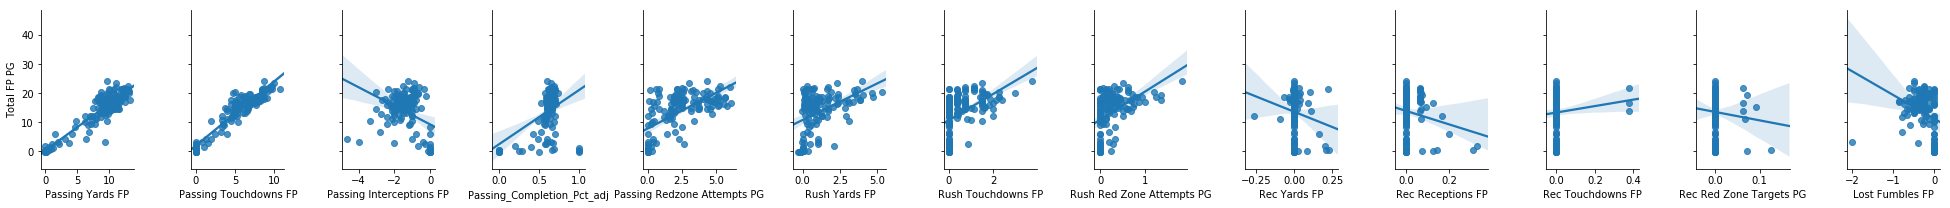

In [9]:
#QB Plot
sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', height=3, aspect =.7,kind='reg' )



 

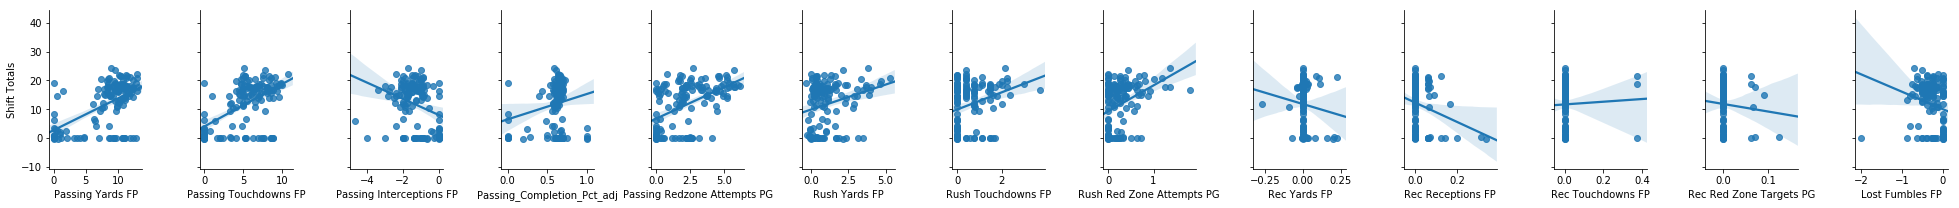

In [23]:
#Prediction Ability
#based on this scatter plot i expect the model to work since it matches the original  data set 

#QB Plot
sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Shift Totals', height=3, aspect =.7,kind='reg' )



 

In [12]:
# features_cols = [ 'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
#        'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',, 'Rec Receptions', 'Rec Red Zone Targets',
#        'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles','Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
#        'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards','Passing Completion Pct','Season Age''Rec Yards FP'

#,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP''Rush Yards FP', 
# 'Passing Completion Pct','Passing Hurries PG', 'Passing Interceptions PG',
#        'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
#        'Passing Yards PG', 'Passing Yards FP', 'Passing Touchdowns FP',
#        'Passing Interceptions FP', 'Rush Yards FP', 'Rush Touchdowns FP',
#        'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP',
#        'Lost Fumbles FP', 'Total FP PG', 'Passing_Completion_Pct_adj'],
features_cols = ['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP',\
                 'Passing Redzone Attempts PG']

features_cols_QB2= ['Season', 'Player Name','Rec Receptions PG', 'Rec Touchdowns PG', 'Lost Fumbles PG','Rush Yards PG',
                    'Passing Completion Pct','Passing Hurries PG', 'Passing Interceptions PG',
                    'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
                    'Passing Yards PG',]

features_cols_QB=['Season', 'Player Name','Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                    'Rush Yards FP', 'Rush Touchdowns FP',]

features_cols_RB = ['Season', 'Player Name','Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']

In [13]:

FP_Calc_RB_x=FP_Calc_RB
x = FP_Calc_RB_x[features_cols_RB]
x.head()


# # xRB = FP_Calc_RB[features_cols_RB]

# # xRB

# print(len(x))

,Season,Player Name,Rush Yards FP,Rush Touchdowns FP,Rush Red Zone Attempts PG,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
1,2012,Jamaal Charles,9.431250,1.875000,0.1250,1.475000,2.187500,0.375000,-0.375
7,2012,Brandon Bolden,2.740000,1.200000,0.0000,0.110000,0.200000,0.000000,-0.000
15,2012,Jonathan Stewart,3.733333,0.666667,0.0000,1.744444,1.888889,0.666667,-0.000
16,2012,Bilal Powell,3.121429,1.714286,0.5000,1.000000,1.214286,0.000000,-0.000
21,2012,Stevan Ridley,7.893750,4.500000,0.1875,0.318750,0.375000,0.000000,-0.250


In [14]:
target_cols = ['Season', 'Player Name','Shift Totals']

In [15]:
FP_Calc_RB_y =FP_Calc_RB
# [FP_Calc_QB.index != 2018]
# [FP_Calc_QB.index != 2012]
y = FP_Calc_RB_y[target_cols]
y
# print(len(FP_Calc_QB_y)),print(len(FP_Calc_QB_x))
y.head()

,Season,Player Name,Shift Totals
1,2012,Jamaal Charles,0
7,2012,Brandon Bolden,0
15,2012,Jonathan Stewart,0
16,2012,Bilal Powell,0
21,2012,Stevan Ridley,0


In [169]:
from sklearn.model_selection import train_test_split

In [253]:
FP_Calc_QB.head()

,Season,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj,Shift Totals
11,2012,247,64797df2-efd3-4b27-86ee-1d48f7edb09f 2012 ebd8...,Joe Flacco,Ravens,QB,16,16,27,0.0,...,-1.250000,0.137500,1.125000,0.0,0.0,0.0,-0.500000,14.555000,0.59699,12.723750
12,2012,357,de816e24-8442-49a4-99cd-dde7e7c05863 2012 f7dd...,Blaine Gabbert,Jaguars,QB,10,10,23,0.0,...,-1.200000,0.560000,0.000000,0.0,0.0,0.0,-0.600000,9.008000,0.58273,4.146667
13,2012,254,7f3ef024-eb34-46af-8b9e-544cdf09378f 2012 ebd8...,Tyrod Taylor,Ravens,QB,7,0,23,0.0,...,-0.285714,1.042857,0.857143,0.0,0.0,0.0,-0.000000,2.637143,0.58621,2.026667
14,2012,684,250199f2-1387-4b55-b96f-17fedea6db7f 2012 3340...,Joe Webb III,Vikings,QB,1,0,26,0.0,...,-0.000000,-0.100000,0.000000,0.0,0.0,0.0,-0.000000,-0.100000,0.00000,0.518750
20,2012,301,ea357add-1a41-4a8b-8f34-bbfade7f4d98 2012 cb2f...,Ben Roethlisberger,Steelers,QB,13,13,30,0.0,...,-1.230769,0.707692,0.000000,0.0,0.0,0.0,-0.461538,17.061538,0.63252,16.177500


In [254]:
x_train = x[x["Season"] < 2017]
y_train = y[y["Season"] < 2017]
x_test = x[x["Season"]== 2017]
y_test = y[y["Season"]== 2017]


# xRB_train = xRB[xRB.index < 2018]
# yRB_train = yRB[yRB.index < 2018]
# xRB_test = xRB[xRB.index == 2018]
# yRB_test = yRB[yRB.index == 2018]

In [207]:
# FP_Calc_QB_train=FP_Calc_QB[FP_Calc_QB["Season"] < 2017]

In [255]:
x_train.head()

,Season,Player Name,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP
11,2012,Joe Flacco,9.542500,5.5,-1.250000,0.137500,1.125000
12,2012,Blaine Gabbert,6.648000,3.6,-1.200000,0.560000,0.000000
13,2012,Tyrod Taylor,1.022857,0.0,-0.285714,1.042857,0.857143
14,2012,Joe Webb III,0.000000,0.0,-0.000000,-0.100000,0.000000
20,2012,Ben Roethlisberger,10.046154,8.0,-1.230769,0.707692,0.000000


In [256]:
x_train.set_index(['Player Name',"Season"], inplace = True) 
y_train.set_index(['Player Name',"Season"], inplace = True) 
x_test.set_index(['Player Name',"Season"], inplace = True) 
y_test.set_index(['Player Name',"Season"], inplace = True) 
# FP_Calc_QB_train.set_index(['Player Name',"Season"], inplace = True) 

In [239]:
x_train.index.values

array([('Joe Flacco', 2012), ('Blaine Gabbert', 2012),
       ('Tyrod Taylor', 2012), ('Joe Webb III', 2012),
       ('Ben Roethlisberger', 2012), ('Kirk Cousins', 2012),
       ('Tom Brady', 2012), ('Derek Anderson', 2012),
       ('Chase Daniel', 2012), ('Drew Brees', 2012), ('Cam Newton', 2012),
       ('Eli Manning', 2012), ('Brock Osweiler', 2012),
       ('Matthew Stafford', 2012), ('Matt Ryan', 2012),
       ('Ryan Fitzpatrick', 2012), ('Alex Smith', 2012),
       ('Russell Wilson', 2012), ('Aaron Rodgers', 2012),
       ('Andy Dalton', 2012), ('Eli Manning', 2013),
       ('Russell Wilson', 2013), ('Tom Brady', 2013),
       ('Derek Anderson', 2013), ('Drew Brees', 2013),
       ('Ryan Fitzpatrick', 2013), ('Joe Flacco', 2013),
       ('Joe Webb III', 2013), ('Kirk Cousins', 2013),
       ('Matt Ryan', 2013), ('Matthew Stafford', 2013),
       ('Chase Daniel', 2013), ('Ben Roethlisberger', 2013),
       ('Brock Osweiler', 2013), ('Andy Dalton', 2013),
       ('Tyrod Taylor', 20

In [257]:
y_test.index.values

array([('Tom Brady', 2017), ('Aaron Rodgers', 2017),
       ('Chase Daniel', 2017), ('Russell Wilson', 2017),
       ('Ryan Fitzpatrick', 2017), ('Derek Anderson', 2017),
       ('Alex Smith', 2017), ('Blaine Gabbert', 2017),
       ('Kirk Cousins', 2017), ('Joe Webb III', 2017),
       ('Joe Flacco', 2017), ('Ben Roethlisberger', 2017),
       ('Matthew Stafford', 2017), ('Drew Brees', 2017),
       ('Cam Newton', 2017), ('Matt Ryan', 2017),
       ('Brock Osweiler', 2017), ('Tyrod Taylor', 2017),
       ('Andy Dalton', 2017), ('Eli Manning', 2017)], dtype=object)

In [258]:
# x_train = x_train.sort_index() 
# y_train = y_train.sort_index() 
print(len(x_train)),print(len(y_train))

100
100


(None, None)

In [241]:
x_train

,,const,Rec Receptions PG,Rec Touchdowns PG,Lost Fumbles PG,Rush Yards PG,Passing Completion Pct,Passing Hurries PG,Passing Interceptions PG,Passing Redzone Attempts PG,Passing Touchdowns PG,Passing Yards PG
Player Name,Season,,,,,,,,,,,
Joe Flacco,2012,1.0,0.000000,0.0000,0.250000,1.375000,59.699,0.000000,0.625000,0.250000,1.375000,238.562500
Blaine Gabbert,2012,1.0,0.000000,0.0000,0.300000,5.600000,58.273,0.000000,0.600000,0.000000,0.900000,166.200000
Tyrod Taylor,2012,1.0,0.000000,0.0000,0.000000,10.428571,58.621,0.000000,0.142857,0.000000,0.000000,25.571429
Joe Webb III,2012,1.0,0.000000,0.0000,0.000000,-1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
Ben Roethlisberger,2012,1.0,0.000000,0.0000,0.230769,7.076923,63.252,0.000000,0.615385,0.692308,2.000000,251.153846
Kirk Cousins,2012,1.0,0.000000,0.0000,0.000000,7.333333,68.750,0.000000,1.000000,0.333333,1.333333,155.333333
Tom Brady,2012,1.0,0.000000,0.0000,0.000000,2.000000,62.951,0.000000,0.500000,0.187500,2.125000,301.687500
Derek Anderson,2012,1.0,0.000000,0.0000,0.000000,0.000000,100.000,0.000000,0.000000,0.000000,0.000000,29.000000
Chase Daniel,2012,1.0,0.000000,0.0000,0.000000,1.062500,100.000,0.000000,0.000000,0.000000,0.000000,0.625000


In [259]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [260]:
x_train = sm.add_constant(x_train)
# model = smf.MixedLM(y_train,x_train,groups=x_train.index)
model = smf.MixedLM(y_train,x_train,groups=x_train.index)
# y_train = list(y_train)
results = model.fit()
# .astype(float)
results.summary()

# xRB_train = sm.add_constant(xRB_train)
# model = sm.OLS(yRB_train,xRB_train)
# RBresults = model.fit()
# # .astype(float)
# RBresults.summary()

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM   Dependent Variable:   Shift Totals
No. Observations:    100       Method:               REML        
No. Groups:          100       Scale:                8.0230      
Min. group size:     1         Likelihood:           -278.4455   
Max. group size:     1         Converged:            Yes         
Mean group size:     1.0                                         
-----------------------------------------------------------------
                         Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------------
const                    2.549    0.850 3.000 0.003  0.883  4.214
Passing Yards FP         0.848    0.267 3.176 0.001  0.325  1.371
Passing Touchdowns FP    0.627    0.303 2.073 0.038  0.034  1.220
Passing Interceptions FP 0.202    0.422 0.479 0.632 -0.625  1.030
Rush Yards FP            0.848    0.412 2.055 0.040  0.039  1.656
Rush Touchdowns FP       0.483    0.641 0.754 0.451 -0.774  1.740
Group Var                8.023                                   
=================================================================

"""

In [191]:
x_test['x_test'] = results.predict()


NameError: name 'dframe' is not defined

In [114]:
x_train.dtypes

Passing Yards FP               float64
Passing Touchdowns FP          float64
Passing Interceptions FP       float64
Rush Yards FP                  float64
Rush Touchdowns FP             float64
Rush Red Zone Attempts PG      float64
Passing Redzone Attempts PG    float64
dtype: object